In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pli

In [2]:
spaceData = pd.read_csv('train.csv')

In [3]:
spaceData.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
spaceData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
spaceData.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
spaceData['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [7]:
spaceData['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

### Replacing all the null values in HomePlanet section as well as Destination with the most occuring value 

In [8]:
catCount = spaceData['HomePlanet'].value_counts()
moc = catCount.idxmax()

spaceData['HomePlanet'].fillna(moc , inplace = True)

C:\Users\kswap\AppData\Local\Temp\ipykernel_15504\3855036089.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spaceData['HomePlanet'].fillna(moc , inplace = True)


In [9]:
spaceData['HomePlanet'].isnull().sum()

0

In [10]:
spaceData['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [11]:
catCount = spaceData['Destination'].value_counts()
moc = catCount.idxmax()

spaceData['Destination'].fillna(moc , inplace = True)

C:\Users\kswap\AppData\Local\Temp\ipykernel_15504\3563164770.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spaceData['Destination'].fillna(moc , inplace = True)


In [12]:
spaceData['Destination'].isnull().sum()

0

## One Hot Encoding the HomePlanet and Destination 

In [13]:
from sklearn.preprocessing import OneHotEncoder 

enc = OneHotEncoder()
matrix = enc.fit_transform(spaceData[['HomePlanet']]).toarray()

columnNames = ['Europa', 'Earth', 'Mars']

for i in range(len(matrix.T)):
    spaceData[columnNames[i]] = matrix.T[i]

matrix = enc.fit_transform(spaceData[['Destination']]).toarray()

columnNames = ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']

for i in range(len(matrix.T)):
    spaceData[columnNames[i]] = matrix.T[i]


In [14]:
spaceData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa,Earth,Mars,TRAPPIST-1e,PSO J318.5-22,55 Cancri e
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1.0,0.0,0.0,0.0,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1.0,0.0,0.0,0.0,0.0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,1.0,0.0,0.0,0.0,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,1.0,0.0,0.0,0.0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
spaceData.drop( columns = ['HomePlanet' , 'Destination' , 'Name'] , inplace = True )

In [16]:
spaceData.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Earth,Mars,TRAPPIST-1e,PSO J318.5-22,55 Cancri e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,0.0,0.0,1.0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,0.0,0.0,1.0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,0.0,0.0,1.0
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,0.0,0.0,1.0
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,0.0,0.0,1.0


### fillin in NaN values

In [17]:
moc = spaceData['CryoSleep'].value_counts().idxmax()

spaceData['CryoSleep'].fillna(moc , inplace = True)

moc = spaceData['VIP'].value_counts().idxmax()

spaceData['VIP'].fillna(moc , inplace = True)




C:\Users\kswap\AppData\Local\Temp\ipykernel_15504\2237564498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spaceData['CryoSleep'].fillna(moc , inplace = True)
C:\Users\kswap\AppData\Local\Temp\ipykernel_15504\2237564498.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spaceData['CryoSleep'].fillna(moc 

### changing boolean to binary 

In [18]:
spaceData['CryoSleep'] = spaceData['CryoSleep'].astype(int)
spaceData['VIP'] = spaceData['VIP'].astype(int)

#### filling up NaN values before extracting information from Cabin 

filling it up cus if we dont do so it will show error "object of type 'float' has no len()"

In [19]:
moc = spaceData['Cabin'].value_counts().idxmax()

spaceData['Cabin'].fillna(moc , inplace = True)

C:\Users\kswap\AppData\Local\Temp\ipykernel_15504\298876449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spaceData['Cabin'].fillna(moc , inplace = True)


1 will represent Port side that is P and 0 -> Starboard

In [20]:
spaceData['side'] = spaceData['Cabin'].apply(lambda x: 1 if 'P' in x[:len(x)] else 0)

In [21]:
##removing the cabin column as well 
spaceData.drop(columns = ['Cabin'] , inplace = True)

### Using Simple Imputer to replace NaN values with the mean 

In [22]:
from sklearn.impute import SimpleImputer 

imp = SimpleImputer(strategy = "mean")
spaceData['Age'] = imp.fit_transform(spaceData[['Age']])
spaceData['RoomService'] = imp.fit_transform(spaceData[['RoomService']])
spaceData['FoodCourt'] = imp.fit_transform(spaceData[['FoodCourt']])
spaceData['ShoppingMall'] = imp.fit_transform(spaceData[['ShoppingMall']])
spaceData['Spa'] = imp.fit_transform(spaceData[['Spa']])
spaceData['VRDeck'] = imp.fit_transform(spaceData[['VRDeck']])


## Heatmap to look for any corelation 

In [23]:
spaceData.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Earth,Mars,TRAPPIST-1e,PSO J318.5-22,55 Cancri e,side
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,0.0,0.0,1.0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,0.0,0.0,1.0,0


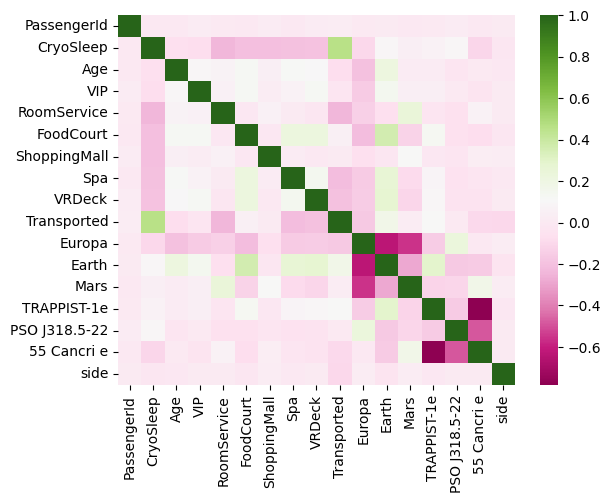

In [24]:
import seaborn as sns 

sns.heatmap(spaceData.corr() , cmap = "PiYG")
pli.show()

In [25]:
spaceData['CryoSleep'].value_counts()

CryoSleep
0    5656
1    3037
Name: count, dtype: int64

In [26]:
transportedBool = spaceData['Transported'].astype(int)

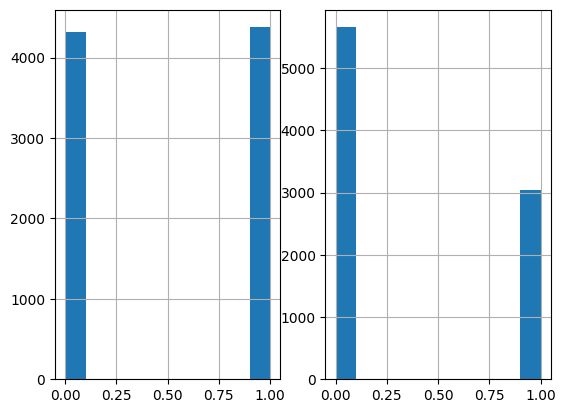

In [27]:
pli.subplot(1,2,1)
transportedBool.hist()

pli.subplot(1,2,2)

spaceData['CryoSleep'].hist()

pli.show()



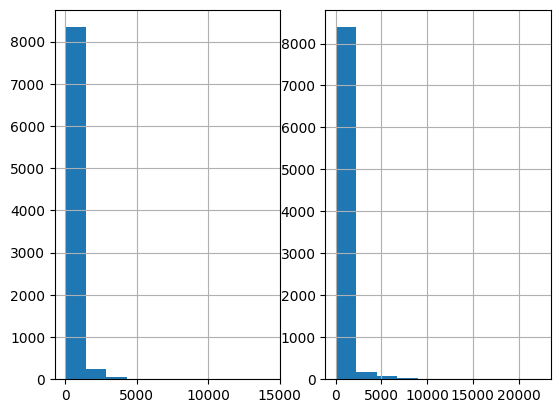

In [28]:
pli.subplot(1,2,1)
spaceData['RoomService'].hist()


pli.subplot(1,2,2)

spaceData['Spa'].hist()

pli.show()




from this we noticed the one who spent more money on ship's services had higher chance to survive 
Also the ones in cryo Sleep had lower chances to survive 

## Model formation

In [30]:
from sklearn.model_selection import train_test_split

X = spaceData.drop(['Transported'] , axis = 1)
y = spaceData['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
lg.fit(X_train , y_train)

In [32]:
print('Training score for Logistic Regression is:' , (lg.score(X_train , y_train)*100) , '%')
print('Validation accuracy' , accuracy_score(y_test , lg.predict(X_test)))

Training score for Logistic Regression is: 77.638769053782 %
Validation accuracy 0.7613571017826337


### Random forest model 

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [34]:
print('Training score of Random forest is:' , (rf.score(X_train , y_train)*100) , '%')
print('Validation Accuracy' , accuracy_score(y_test , rf.predict(X_test)))

Training score of Random forest is: 100.0 %
Validation Accuracy 0.7866589994249569


## TEST DATA

In [35]:
testData = pd.read_csv('test.csv')

### Settin up for prediction 

In [36]:
##DATA CLEANING

catCount = testData['Destination'].value_counts()
moc = catCount.idxmax()
testData['Destination'].fillna(moc , inplace = True)

catCount = testData['HomePlanet'].value_counts()
moc = catCount.idxmax()
testData['HomePlanet'].fillna(moc , inplace = True)

moc = testData['CryoSleep'].value_counts().idxmax()
testData['CryoSleep'].fillna(moc , inplace = True)

moc = testData['VIP'].value_counts().idxmax()
testData['VIP'].fillna(moc , inplace = True)

moc = testData['Cabin'].value_counts().idxmax()
testData['Cabin'].fillna(moc , inplace = True)


## One Hot Encoding

from sklearn.preprocessing import OneHotEncoder 

enc = OneHotEncoder()
matrix = enc.fit_transform(testData[['HomePlanet']]).toarray()

columnNames = ['Europa', 'Earth', 'Mars']

for i in range(len(matrix.T)):
    testData[columnNames[i]] = matrix.T[i]

matrix = enc.fit_transform(testData[['Destination']]).toarray()

columnNames = ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']

for i in range(len(matrix.T)):
    testData[columnNames[i]] = matrix.T[i]

## Bolean to binary 

testData['CryoSleep'] = testData['CryoSleep'].astype(int)
testData['VIP'] = testData['VIP'].astype(int)

## taking side from the cabin section
testData['side'] = testData['Cabin'].apply(lambda x: 1 if 'P' in x[:len(x)] else 0)


testData.drop(columns = ['Cabin' , 'Name' , 'Destination' , 'HomePlanet'] , inplace = True)


## For numerical data Null filling


imp = SimpleImputer(strategy = "mean")
testData['Age'] = imp.fit_transform(testData[['Age']])
testData['RoomService'] = imp.fit_transform(testData[['RoomService']])
testData['FoodCourt'] = imp.fit_transform(testData[['FoodCourt']])
testData['ShoppingMall'] = imp.fit_transform(testData[['ShoppingMall']])
testData['Spa'] = imp.fit_transform(testData[['Spa']])
testData['VRDeck'] = imp.fit_transform(testData[['VRDeck']])




C:\Users\kswap\AppData\Local\Temp\ipykernel_15504\1072151043.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testData['Destination'].fillna(moc , inplace = True)
C:\Users\kswap\AppData\Local\Temp\ipykernel_15504\1072151043.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [37]:
testData

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Earth,Mars,TRAPPIST-1e,PSO J318.5-22,55 Cancri e,side
0,0013_01,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0018_01,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0019_01,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,0021_01,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,0023_01,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4273,9269_01,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4274,9271_01,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4275,9273_01,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0.0,1.0,0.0,0.0,0.0,1.0,1


### Predicting with Linear Regression model 

In [38]:
y_result = lg.predict(testData)
y_result

array([ True, False,  True, ...,  True,  True,  True])

In [40]:
output = pd.DataFrame({'PassengerID': testData['PassengerId'] , 'Transported' : y_result})
output

,PassengerID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [42]:
output.to_csv('SpaceShip_TitanicLG.csv' , index = False)

### Predicting with Random Forest model 

In [43]:
y2_result = rf.predict(testData)
y2_result

array([False, False,  True, ...,  True,  True, False])

In [45]:
output2 = pd.DataFrame({'PassengerID' : testData['PassengerId'] , 'Transported' : y2_result})
output2

,PassengerID,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [46]:
output2.to_csv('SpaceShip_TitanicRF.csv' , index = False)